In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
df = pd.read_csv('bestsellers with categories.csv')


In [14]:
print(df.head())
print(df.shape)

                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  user_rating  reviews  price  year        genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  
(550, 7)


# Pytanie: O ilu książkach przechowywane są dane w zbiorze danych?
# Odpowiedź: 50

#  Zmieńmy nazwy zmiennych na małe litery i zamieńmy spację na podkreślenie (snake_style)


In [15]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']


# Pierwotne badanie danych
# Sprawdź, czy wszystkie wiersze zawierają wystarczającą ilość danych: wypisz liczbę pustych miejsc (na) w każdej kolumnie (użyj funkcji isna i sum).


In [16]:
print(df.isna().sum())


name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64


# Pytanie: Czy są jakieś zmienne z brakującymi wartościami? (Tak / Nie)
# Odpowiedź: Nie

#  Sprawdź unikalne wartości w kolumnie genre (użyj funkcji unique).


In [17]:
print(df['genre'].unique())


['Non Fiction' 'Fiction']


# Pytanie: Jakie są unikalne gatunki?
# Odpowiedź: ['Non Fiction']

# Spójrz na rozkład cen: zbuduj wykres (użyj kind='hist')


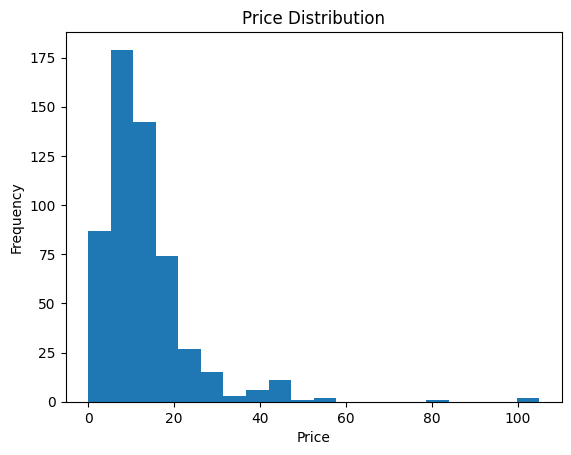

In [18]:
df['price'].plot(kind='hist', bins=20)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

# Określ maksymalną, minimalną, średnią i medianową cenę (użyj funkcji max, min, mean, median).


In [19]:
max_price = df['price'].max()
min_price = df['price'].min()
mean_price = df['price'].mean()
median_price = df['price'].median()

print(f'Max Price: {max_price}')
print(f'Min Price: {min_price}')
print(f'Mean Price: {mean_price}')
print(f'Median Price: {median_price}')

Max Price: 105
Min Price: 0
Mean Price: 13.1
Median Price: 11.0


# Pytanie: Cena maksymalna?
# Odpowiedź: 105

# Pytanie: Cena minimalna?
# Odpowiedź: 0

# Pytanie: Średnia cena?
# Odpowiedź: 13.1

# Pytanie: Mediana ceny?
# Odpowiedź: 11


# Wyszukiwanie i sortowanie danych
# Pytanie: Jaka jest najwyższa ocena w zbiorze danych? Odpowiedź:

In [20]:
highest_rating = df['user_rating'].max()
print(f'Highest Rating: {highest_rating}')

Highest Rating: 4.9


#  Pytanie: Ile książek ma taką ocenę? Odpowiedź:


In [21]:

num_books_highest_rating = df[df['user_rating'] == highest_rating].shape[0]
print(f'Number of books with highest rating: {num_books_highest_rating}')

Number of books with highest rating: 52


# Pytanie: Która książka ma najwięcej recenzji? Odpowiedź:


In [22]:
book_most_reviews = df[df['reviews'] == df['reviews'].max()]['name'].values[0]
print(f'Book with most reviews: {book_most_reviews}')

Book with most reviews: Where the Crawdads Sing


#  Pytanie: Która z książek z Top 50 w 2015 roku jest najdroższa (możesz użyć pośredniej ramki danych)? Odpowiedź:


In [23]:
most_expensive_book_2015 = df[(df['year'] == 2015)].sort_values(by='price', ascending=False).iloc[0]['name']
print(f'Most expensive book in 2015: {most_expensive_book_2015}')

Most expensive book in 2015: Publication Manual of the American Psychological Association, 6th Edition


# Pytanie: Ile książek z gatunku Fiction znalazło się w Top 50 w 2010 roku (użyj &)? Odpowiedź:


In [24]:
num_fiction_books_2010 = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')].shape[0]
print(f'Number of Fiction books in 2010: {num_fiction_books_2010}')


Number of Fiction books in 2010: 20


# Pytanie: Ile książek z oceną 4,9 znalazło się w rankingu w 2010 i 2011 roku (użyj | lub funkcji isin)? Odpowiedź:


In [25]:
num_books_rating_4_9_2010_2011 = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))].shape[0]
print(f'Number of books with 4.9 rating in 2010 and 2011: {num_books_rating_4_9_2010_2011}')



Number of books with 4.9 rating in 2010 and 2011: 1


#  Posortuj rosnąco według ceny wszystkie książki, które znalazły się w rankingu w 2015 roku i kosztowały mniej niż 8 dolarów.


In [26]:
sorted_books_2015_under_8 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')
last_book_sorted = sorted_books_2015_under_8.iloc[-1]['name']
print(f'Last book on sorted list: {last_book_sorted}')

Last book on sorted list: Old School (Diary of a Wimpy Kid #10)


# Agregacja danych i łączenie tabel
# Maksymalne i minimalne ceny dla każdego gatunku

In [27]:
genre_price_stats = df.groupby('genre')['price'].agg(['max', 'min'])
print(genre_price_stats)

             max  min
genre                
Fiction       82    0
Non Fiction  105    0


# Pytanie: Maksymalna cena dla gatunku Fiction:
# Odpowiedź: 82

# Pytanie: Minimalna cena dla gatunku Fiction:
# Odpowiedź: 0

# Pytanie: Maksymalna cena dla gatunku Non Fiction:
# Odpowiedź: 105

# Pytanie: Minimalna cena dla gatunku Non Fiction:
# Odpowiedź: 0

#  Utwórz nową ramkę danych, która będzie przechowywać liczbę książek dla każdego autora


In [29]:
author_book_count = df.groupby('author').agg({'name': 'count'}).rename(columns={'name': 'book_count'})
print(author_book_count.shape)

(248, 1)



# Pytanie: Jaki jest wymiar tabeli?
# Odpowiedź: (248, 1)

# Pytanie: Który autor ma najwięcej książek?


In [30]:
most_books_author = author_book_count['book_count'].idxmax()
print(f'Author with most books: {most_books_author}')


Author with most books: Jeff Kinney


# Pytanie: Ile jest książek tego autora?


In [31]:
num_books_most_author = author_book_count['book_count'].max()
print(f'Number of books by most author: {num_books_most_author}')

Number of books by most author: 12


# Utwórz drugą ramkę danych, która będzie zawierać średnią ocenę dla każdego autora


In [32]:
author_avg_rating = df.groupby('author').agg({'user_rating': 'mean'}).rename(columns={'user_rating': 'avg_rating'})


# Pytanie: Który autor ma najniższą średnią ocenę?


In [33]:
lowest_avg_rating_author = author_avg_rating['avg_rating'].idxmin()
print(f'Author with lowest avg rating: {lowest_avg_rating_author}')


Author with lowest avg rating: Donna Tartt


# Pytanie: Jaka jest średnia ocena tego autora?


In [34]:
lowest_avg_rating = author_avg_rating['avg_rating'].min()
print(f'Lowest average rating: {lowest_avg_rating}')


Lowest average rating: 3.9


#  Połącz dwie ostatnie ramki danych, aby zobaczyć liczbę książek i średnią ocenę dla każdego autora


In [35]:
author_stats = pd.concat([author_book_count, author_avg_rating], axis=1)


#  Posortuj ramki danych według rosnącej liczby książek i rosnącej oceny


In [36]:
sorted_author_stats = author_stats.sort_values(by=['book_count', 'avg_rating'])


# Pytanie: Który autor jest pierwszy na liście?


In [37]:
first_author_sorted = sorted_author_stats.iloc[0].name
print(f'First author on sorted list: {first_author_sorted}')

First author on sorted list: Muriel Barbery


# Wykres słupkowy - liczba książek w zależności od gatunku


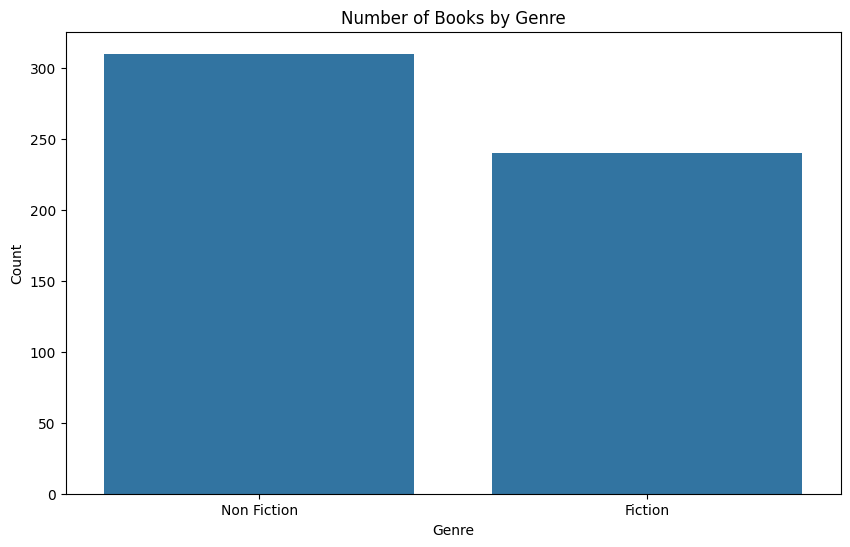

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x='genre', data=df)
plt.title('Number of Books by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()


# Wykres liniowy - średnia cena książek w zależności od roku


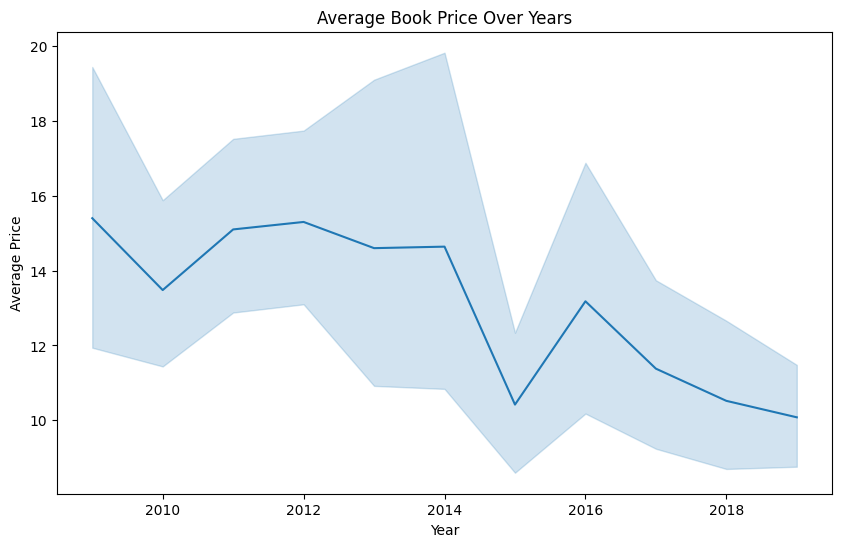

In [42]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='price', data=df)
plt.title('Average Book Price Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

# Wykres histogram - rozkład ocen użytkowników


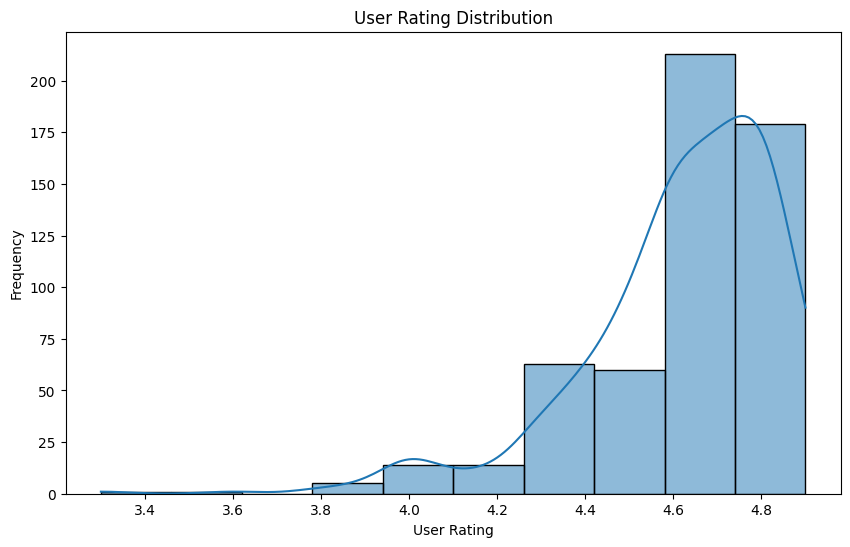

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(df['user_rating'], bins=10, kde=True)
plt.title('User Rating Distribution')
plt.xlabel('User Rating')
plt.ylabel('Frequency')
plt.show()
